In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#def funcion y derivada de la función
def f(x):
    return np.sin(x)
def df(x):
    return np.cos(x)

In [51]:
#puntos experimentales
x_list=[.2,.4,.6,.8,1,1.4,1.8,2.4]
y_list=[f(.2),f(.4),f(.6),f(.8),f(1),f(1.4),f(1.8),f(2.4)]
dydx_list=[df(.2),df(.4),df(.6),df(.8),df(1),df(1.4),df(1.8),df(2.4)]

In [52]:
#matriz de hermite
z=np.zeros(2*len(x_list))
Q=np.zeros((2*len(x_list),2*len(x_list)))
for i in range(0,len(x_list)):
    z[2*i]=x_list[i]
    z[2*i+1]=x_list[i] 
    Q[2*i][0]=y_list[i]
    Q[2*i+1][0]=y_list[i]
    Q[2*i+1][1]=dydx_list[i]
    if(i!=0):
        Q[2*i][1]=(Q[2*i-1][0]-Q[2*i][0])/(z[2*i-1]-z[2*i])
for i in range(2,2*len(x_list)):
    for j in range(2,i+1):
        Q[i][j]=(Q[i][j-1]-Q[i-1][j-1])/(z[i]-z[i-j])
  

In [53]:
#polinomio de hermite
def PoliHermite(x_list,y_list,x):
    sum=y_list[0]
    for i in range(1,2*len(x_list)):
        prod=1
        for j in range(0,i):
                prod=prod*(x-z[j])
        sum=sum+Q[i][i]*prod
    return sum

In [54]:
#evaluemos el polinomio hallado por diferencias divididas
x_array=np.linspace(min(x_list),max(x_list),100)
y_array=[]
for i in range(0,len(x_array)):
    y_array.append(PoliHermite(x_list,y_list,x_array[i]))

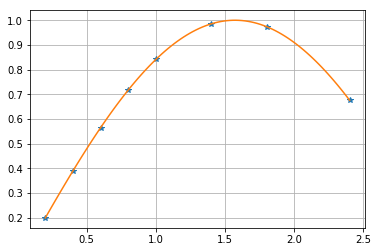

In [55]:
#grafiquemos
fig=plt.figure()
ax=plt.axes()
ax.plot(x_list,y_list,"*")
ax.plot(x_array,y_array)
plt.grid()
plt.show()

In [59]:
#determinemos el error e un punto de el polinomio interpolante vs la funcion real
y_der=PoliHermite(x_list,y_list,1.45)
y_exac=f(1.45)
error=abs((y_der-y_exac)/y_exac*100)
print("error=%.14f "%(error),"%")
print(PoliHermite(x_list,y_list,1.45))
print(f(1.45))

error=0.00000000000001  %
0.9927129910375886
0.9927129910375885


# Hermite como función 

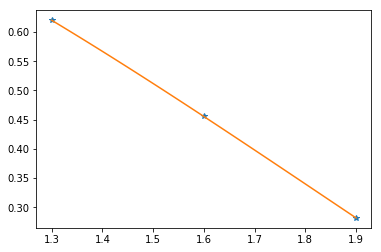

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x_list = [1.3,1.6,1.9]
y_list = [0.6200860,0.4554022,0.2818186]
dydx_list = [-0.5220232,-0.5698959,-0.5811571]


Q = np.zeros((2*len(x_list),2*len(x_list)))
Z = np.zeros(2*len(x_list))

for i in range(0,len(x_list)):
    Z[2*i]      = x_list[i]
    Z[2*i+1]    = x_list[i]
    Q[2*i][0]   = y_list[i]
    Q[2*i+1][0] = y_list[i]
    Q[2*i+1][1] = dydx_list[i]
    if i!=0:
        Q[2*i][1] = (Q[2*i][0]-Q[2*i-1][0]) / (Z[2*i]-Z[2*i-1])
        
for i in range(2,len(Z)):
    for j in range(2,i+1):
        Q[i][j] = (Q[i][j-1]-Q[i-1][j-1]) / (Z[i]-Z[i-j])



def PolyHermite(x):
    sum = 0
    for i in range(1,len(Z)):
        prod = 1.0
        for j in range(0,i):
            prod = prod*(x-Z[j])
        sum=sum+Q[i][i]*prod
    H = Q[0][0]+sum 
    return H
            

x_array=np.linspace(min(x_list),max(x_list),100)
y_array=[]

for i in range(0,len(x_array)):
    y_array.append(PolyHermite(x_array[i]))
    
fig=plt.figure()
ax=plt.axes()
ax.plot(x_list,y_list,'*')
ax.plot(x_array,y_array)